In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
tit = pd.read_csv('titanic_train.csv')

In [3]:
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
tit.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

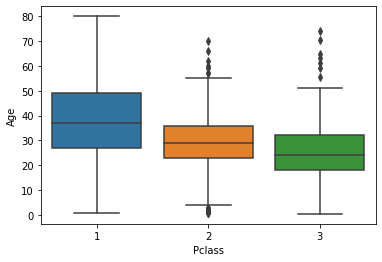

In [5]:
sns.boxplot(y=tit['Age'],x=tit['Pclass'])

In [6]:
# we are going to apply mean of ages acc to passengers class

In [7]:
def mean_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [8]:
#droping cabin as there is more records
#adding mean of age as there is less records
#adding mean of embarked as there is only 2 records

tit.drop(['Cabin'],axis=1,inplace=True)
tit['Age'] = tit[['Age','Pclass']].apply(mean_age,axis=1)
tit['Embarked'].fillna((tit['Embarked'].mean),inplace=True)



In [9]:
tit['Embarked'].isna().sum()
tit['Age'].isna().sum()

0

In [10]:
tit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [11]:
#remove Embarked
tit.drop(['Embarked'],axis=1,inplace=True)

In [12]:
tit

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000


In [13]:
def sex(st):
    if st == 'male':
        return 1
    else:
        return 0

In [14]:
#1 for male
#0 for female

tit['Sex'] = tit['Sex'].apply(sex)

In [15]:
tit.drop(['PassengerId','Pclass','Name','Ticket',],axis=1,inplace=True)

In [16]:
tit

,Survived,Sex,Age,SibSp,Parch,Fare
0,0,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,1,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,0,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
888,0,0,24.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [17]:
x = tit.drop(['Survived'],axis=1)
y = tit['Survived']

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3)

In [20]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)
log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(X_train, Y_train)

from sklearn.svm import SVC
svc_lin = SVC(kernel = 'linear', random_state = 0,probability=True)
svc_lin.fit(X_train, Y_train)

  

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
print('[1]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
print('[2]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
print('[3]Support Vector Machine Training Accuracy:', svc_lin.score(X_train, Y_train))
print('[4]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
print('[5]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  

[1]Logistic Regression Training Accuracy: 0.7865168539325843
[2]K Nearest Neighbor Training Accuracy: 0.7945425361155698
[3]Support Vector Machine Training Accuracy: 0.7800963081861958
[4]Decision Tree Classifier Training Accuracy: 0.9903691813804173
[5]Random Forest Classifier Training Accuracy: 0.9759229534510433


In [21]:
#Although Decission Tree provides 98% proability 
#But for % wise prediciton we are using Support Vector Machine


In [22]:
test_lst=[]
names=['Sex:1 for Male,0 for Female','Age' ,'Count of Sibling or Spouse on ship', 'Count of parent or Children on ship','Your Fare']

for i in range(5):
    print(names[i])
    a=float(input())
    test_lst.append(a)

Sex:1 for Male,0 for Female
1
Age
22
Count of Sibling or Spouse on ship
0
Count of parent or Children on ship
0
Your Fare
500


In [26]:
pred = svc_lin.predict([test_lst])
print("The predicted value is:",pred)



The predicted value is: [0]


In [27]:
probabilities=svc_lin.predict_proba([test_lst])
#print(probabilities)
nsur = probabilities[0,0]
sur = probabilities[0,1]
print(f'Not Surviving prediction: {nsur*100}% ')
print(f'Surviving prediction:     {sur*100}% ')

Not Surviving prediction: 80.39942561454862% 
Surviving prediction:     19.600574385451395% 


In [25]:
#saving this file as pickle
import pickle 
pickle.dump(tree,open("surv_tit",'wb'))